In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [4]:
df = pd.read_csv('/content/drive/MyDrive/dataset.csv')
df.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,NaN,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1.0,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1.0,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1.0,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,NaN,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1,1


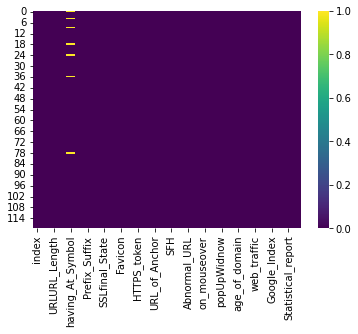

In [5]:
sns.heatmap(df[0:120].isnull(), cmap= 'viridis')
plt.savefig('heatmap.png')

In [6]:
df.describe()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,10959.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.703440,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,0.728268,0.675079,0.186793,-0.076526,-0.118137,-0.595749,0.635640,0.705292,0.115694,0.762099,0.913885,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.710787,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,0.685324,0.737779,0.982444,0.715138,0.763973,0.759143,0.772021,0.708949,0.319872,0.647490,0.405991,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
print(df.corr()['Result'].sort_values())

Domain_registeration_length   -0.225789
Shortining_Service            -0.067966
Abnormal_URL                  -0.060488
HTTPS_token                   -0.039854
double_slash_redirecting      -0.038608
Redirect                      -0.020113
Iframe                        -0.003394
Favicon                       -0.000280
popUpWidnow                    0.000086
index                          0.000978
RightClick                     0.012653
Submitting_to_email            0.018249
Links_pointing_to_page         0.032574
port                           0.036419
on_mouseover                   0.041838
having_At_Symbol               0.051330
URLURL_Length                  0.057430
DNSRecord                      0.075718
Statistical_report             0.079857
having_IPhaving_IP_Address     0.094160
Page_Rank                      0.104645
age_of_domain                  0.121496
Google_Index                   0.128950
SFH                            0.221419
Links_in_tags                  0.248229


In [8]:
# Remove features having correlation coeff. between +/- 0.03
df.drop(['Favicon','Iframe','Redirect',
                'popUpWidnow','RightClick','Submitting_to_email'],axis=1,inplace=True)
print(len(df.columns))

26


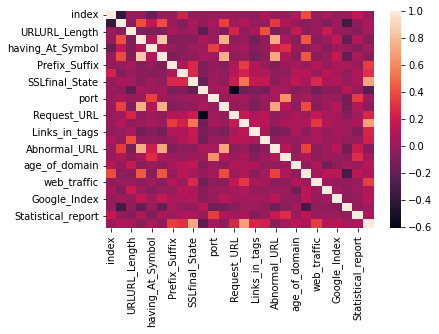

In [9]:
sns.heatmap(df.corr())
plt.savefig('corr.png')

In [10]:
l = [1,-1]
length = len(df)
# df.head()
for i in range(length):
  if(df['having_At_Symbol'].isnull().sum()):
    rand = random.randint(0,1)
    df['having_At_Symbol'][i] = l[rand]
  
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Abnormal_URL,on_mouseover,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1.0,-1,-1,-1,-1,-1,1,-1,1,-1,1,-1,-1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1.0,1,-1,0,1,-1,1,-1,1,0,-1,-1,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1.0,1,-1,-1,-1,-1,1,-1,1,0,-1,-1,-1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,-1.0,1,-1,-1,-1,1,1,-1,-1,0,0,-1,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,-1.0,1,-1,1,1,-1,1,1,1,0,0,-1,1,-1,-1,-1,0,-1,1,1,1,1


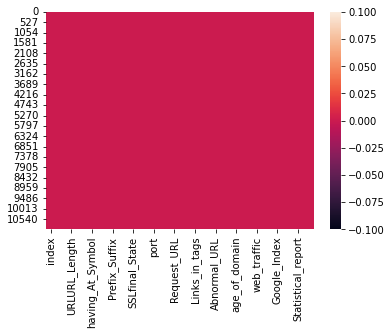

In [11]:
# print(df['having_At_Symbol'])
sns.heatmap(df.isnull())
plt.savefig('clean_heatmap.png')

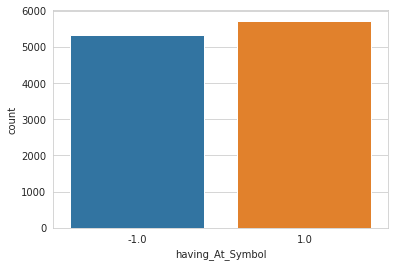

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='having_At_Symbol',data=df)

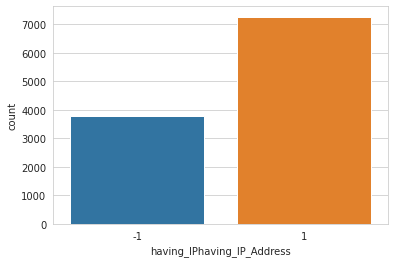

In [13]:
sns.countplot(x='having_IPhaving_IP_Address',data=df)

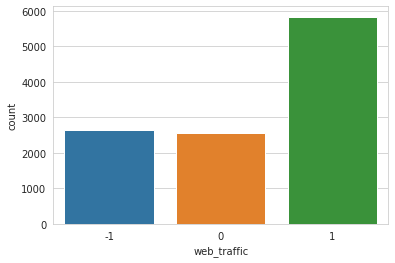

In [14]:
sns.countplot(x='web_traffic', data=df)

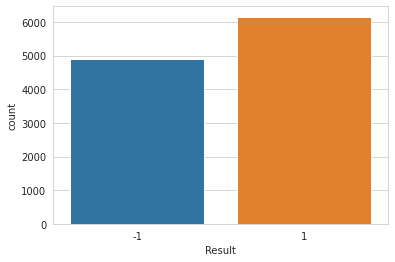

In [15]:
sns.countplot(x='Result', data=df)

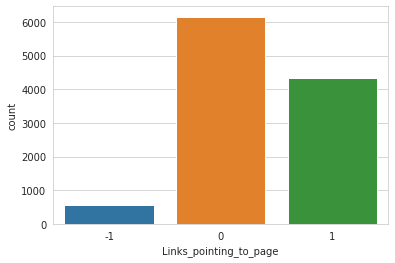

In [16]:
sns.countplot(x='Links_pointing_to_page', data=df)

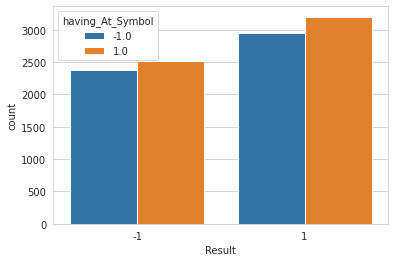

In [17]:
sns.countplot(x='Result', hue='having_At_Symbol', data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


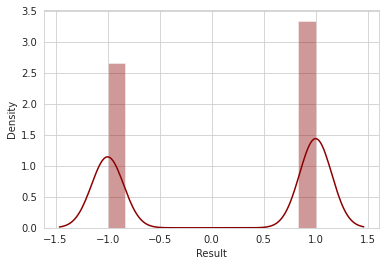

In [18]:
sns.distplot(df['Result'], color='darkred')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


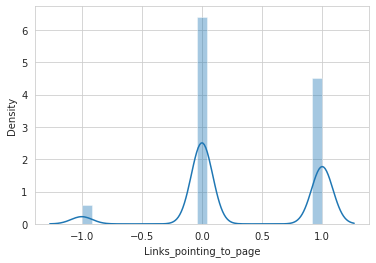

In [19]:
sns.distplot(df['Links_pointing_to_page'])

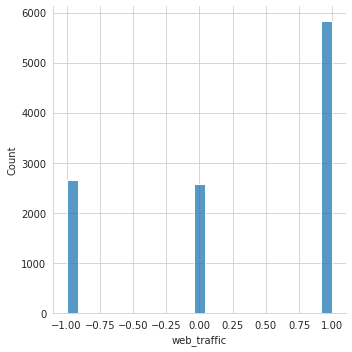

In [20]:
sns.displot(df['web_traffic'])

In [21]:
a=len(df[df.Result==0])
b=len(df[df.Result==-1])
c=len(df[df.Result==1])
print("Count of Legitimate Websites = ", b)
print("Count of Suspicious Websites = ", a)
print("Count of Phishy Websites = ", c)

Count of Legitimate Websites =  4898
Count of Suspicious Websites =  0
Count of Phishy Websites =  6157


In [22]:
df.drop(['index'],axis=1,inplace=True)
print(len(df.columns))

25


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f91cb074350>,
      dtype=object)

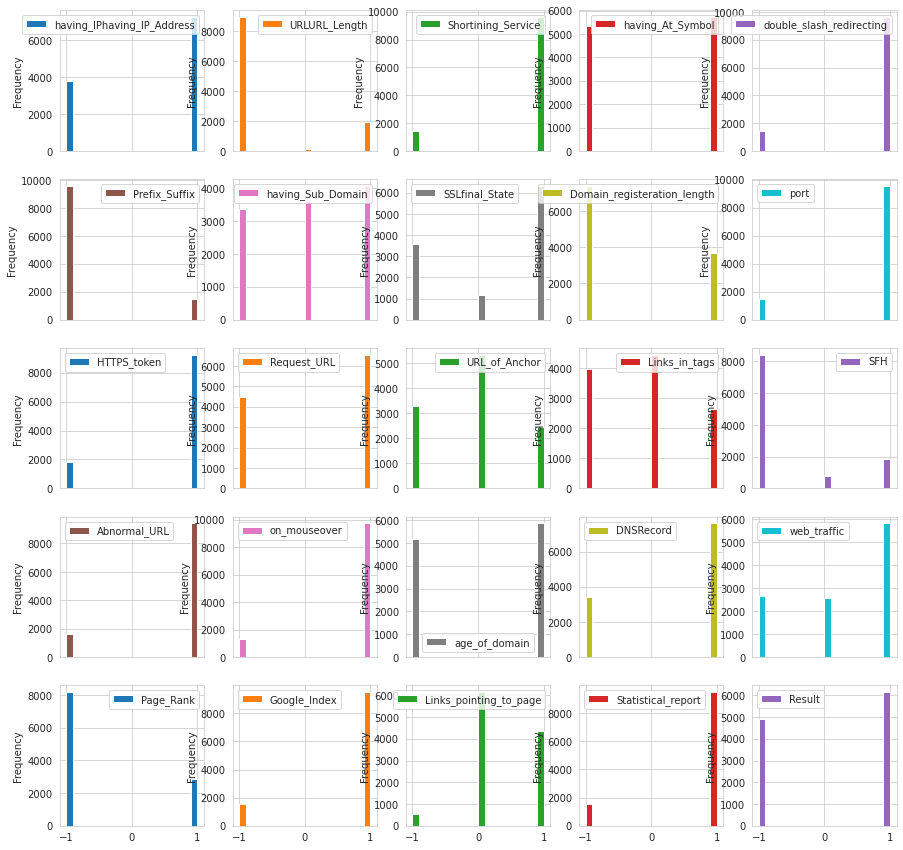

In [23]:
df.plot.hist(subplots=True,layout=(5,5),figsize=(15, 15), bins=20)

In [24]:
df.corr()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Abnormal_URL,on_mouseover,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
having_IPhaving_IP_Address,1.000000,-0.052411,0.403461,-0.012244,0.397389,-0.005257,-0.080745,0.071414,-0.022739,0.060979,0.363534,0.029773,0.099847,0.006212,-0.010962,0.336549,0.084059,-0.010446,-0.050733,0.002922,-0.091774,0.029153,-0.339065,-0.019103,0.094160
URLURL_Length,-0.052411,1.000000,-0.097881,0.000596,-0.081247,0.055247,0.003997,0.048754,-0.221892,0.000323,-0.089383,0.246348,-0.023396,0.052869,0.414196,-0.106761,-0.045103,0.179426,-0.040823,0.008993,0.183518,0.002902,-0.022987,-0.067153,0.057430
Shortining_Service,0.403461,-0.097881,1.000000,-0.004150,0.842796,-0.080471,-0.041916,-0.061426,0.060923,0.002201,0.757838,-0.037235,0.000561,-0.133379,-0.022723,0.739290,0.062383,-0.052596,0.436064,-0.047074,0.014591,0.155844,-0.198410,0.085461,-0.067966
having_At_Symbol,-0.012244,0.000596,-0.004150,1.000000,-0.005659,-0.007017,0.001135,-0.002691,0.004934,0.041890,-0.011073,0.001540,0.001977,0.005654,0.004120,0.000517,0.024893,0.032764,0.021408,0.009713,-0.022319,-0.012322,-0.006056,0.011017,0.005733
double_slash_redirecting,0.397389,-0.081247,0.842796,-0.005659,1.000000,-0.085590,-0.043079,-0.036200,0.047464,0.025060,0.760799,-0.026368,-0.005036,-0.125583,-0.041672,0.723724,0.086635,-0.050107,0.431409,-0.062369,-0.003132,0.178415,-0.194165,0.070390,-0.038608
Prefix_Suffix,-0.005257,0.055247,-0.080471,-0.007017,-0.085590,1.000000,0.087891,0.261391,-0.096799,-0.022546,-0.070153,0.098675,0.348871,0.100254,0.001326,-0.077620,0.012578,0.074116,-0.016556,0.110598,-0.006834,0.067781,0.067423,-0.002763,0.348606
having_Sub_Domain,-0.080745,0.003997,-0.041916,0.001135,-0.043079,0.087891,1.000000,0.267649,-0.082839,0.004863,-0.037239,0.104857,0.229491,0.093646,0.096089,-0.034908,-0.018082,0.119254,0.125493,-0.005764,0.120730,0.057673,-0.010526,0.081627,0.298323
SSLfinal_State,0.071414,0.048754,-0.061426,-0.002691,-0.036200,0.261391,0.267649,1.000000,-0.193622,0.027473,-0.029941,0.193054,0.535786,0.176825,0.171402,-0.046245,0.023586,0.162809,0.050972,0.258768,0.074545,0.096051,-0.011710,0.063411,0.714741
Domain_registeration_length,-0.022739,-0.221892,0.060923,0.004934,0.047464,-0.096799,-0.082839,-0.193622,1.000000,0.022478,0.059161,-0.609970,-0.160257,-0.101084,-0.136422,0.058109,0.023784,-0.062851,-0.010477,-0.134454,-0.059898,-0.039766,0.122672,-0.002212,-0.225789
port,0.060979,0.000323,0.002201,0.041890,0.025060,-0.022546,0.004863,0.027473,0.022478,1.000000,0.004999,0.027561,0.039891,-0.066502,0.006672,0.054126,0.623298,0.008459,0.054849,-0.028543,0.017954,-0.005413,-0.139104,0.343987,0.036419


In [25]:
from sklearn.model_selection import train_test_split,cross_val_score
X= df.drop(columns='Result')
X.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Abnormal_URL,on_mouseover,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1.0,-1,-1,-1,-1,-1,1,-1,1,-1,1,-1,-1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1.0,1,-1,0,1,-1,1,-1,1,0,-1,-1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1.0,1,-1,-1,-1,-1,1,-1,1,0,-1,-1,-1,1,1,-1,1,-1,1,0,-1
3,1,0,1,-1.0,1,-1,-1,-1,1,1,-1,-1,0,0,-1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,-1.0,1,-1,1,1,-1,1,1,1,0,0,-1,1,-1,-1,-1,0,-1,1,1,1


In [26]:
Y=df['Result']
Y=pd.DataFrame(Y)
Y.head()

,Result
0,-1
1,-1
2,-1
3,-1
4,1


In [27]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.40,random_state=10)
print("Training set has {} samples.".format(train_X.shape[0]))
print("Testing set has {} samples.".format(test_X.shape[0]))

Training set has 6633 samples.
Testing set has 4422 samples.


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
logreg=LogisticRegression()
model_1=logreg.fit(train_X,train_Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
logreg_predict= model_1.predict(test_X)
print('The accurcy of Logistic Regression Model is : ', 100.0 * accuracy_score(logreg_predict,test_Y))

The accurcy of Logistic Regression Model is :  92.83129805517866


In [30]:
print(classification_report(logreg_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.90      0.93      0.92      1863
           1       0.95      0.93      0.94      2559

    accuracy                           0.93      4422
   macro avg       0.93      0.93      0.93      4422
weighted avg       0.93      0.93      0.93      4422



In [31]:
def plot_confusion_matrix(test_Y, predict_y):
 C = confusion_matrix(test_Y, predict_y)
 A =(((C.T)/(C.sum(axis=1))).T)
 B =(C/C.sum(axis=0))
 plt.figure(figsize=(20,4))
 labels = [1,2]
 cmap=sns.light_palette("blue")
 plt.subplot(1, 3, 1)
 sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Confusion matrix")
 plt.subplot(1, 3, 2)
 sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Precision matrix")
 plt.subplot(1, 3, 3)
 sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Recall matrix")
 plt.show()

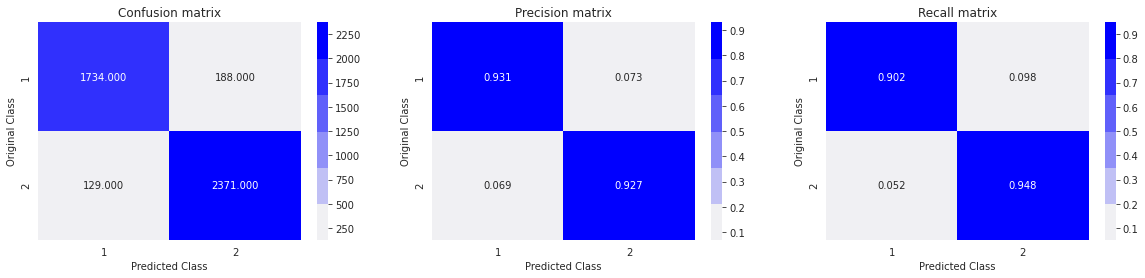

In [32]:
plot_confusion_matrix(test_Y, logreg_predict)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


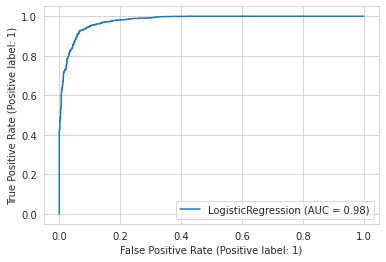

In [33]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model_1,test_X, test_Y)

Text(0, 0.5, 'Error Rate')

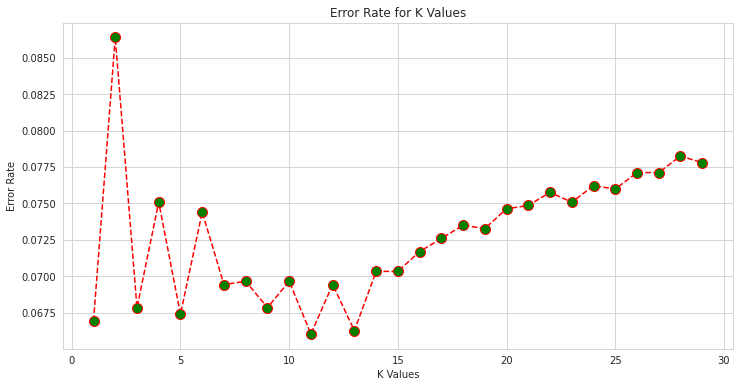

In [34]:
from sklearn.neighbors import KNeighborsClassifier
error = []
for i in range(1, 30):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(train_X, train_Y.values.ravel())
  pred_i = knn.predict(test_X)
  error.append(np.mean(pred_i != test_Y.values.ravel()))
plt.figure(figsize=(12,6))
plt.plot(range(1,30), error, color='red', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)
plt.title('Error Rate for K Values')
plt.xlabel('K Values')
plt.ylabel('Error Rate')

In [35]:
knn=KNeighborsClassifier(n_neighbors=1)
model_2= knn.fit(train_X,train_Y)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [36]:
knn_predict=model_2.predict(test_X)
print('The accuracy of KNN Model is: ', 100.0 * accuracy_score(knn_predict,test_Y))
print(classification_report(test_Y,knn_predict))

The accuracy of KNN Model is:  93.30619629127092
              precision    recall  f1-score   support

          -1       0.92      0.93      0.92      1922
           1       0.94      0.94      0.94      2500

    accuracy                           0.93      4422
   macro avg       0.93      0.93      0.93      4422
weighted avg       0.93      0.93      0.93      4422



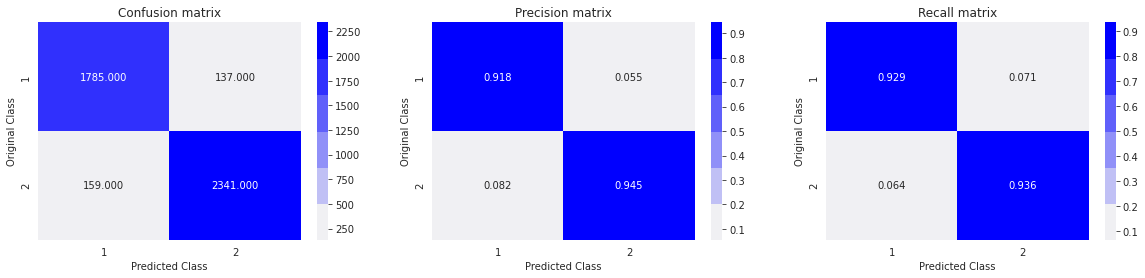

In [37]:
plot_confusion_matrix(test_Y, knn_predict)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


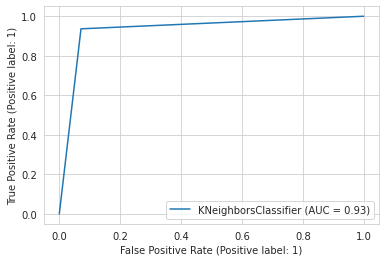

In [38]:
plot_roc_curve(model_2,test_X, test_Y)

In [39]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
model_3=dtree.fit(train_X,train_Y)
dtree_predict=model_3.predict(test_X)
print('The accuracy of Decision Tree Classifier is: ', 100.0 * accuracy_score(dtree_predict,test_Y))
print(classification_report(dtree_predict,test_Y))

The accuracy of Decision Tree Classifier is:  95.70330167345092
              precision    recall  f1-score   support

          -1       0.95      0.95      0.95      1928
           1       0.96      0.96      0.96      2494

    accuracy                           0.96      4422
   macro avg       0.96      0.96      0.96      4422
weighted avg       0.96      0.96      0.96      4422



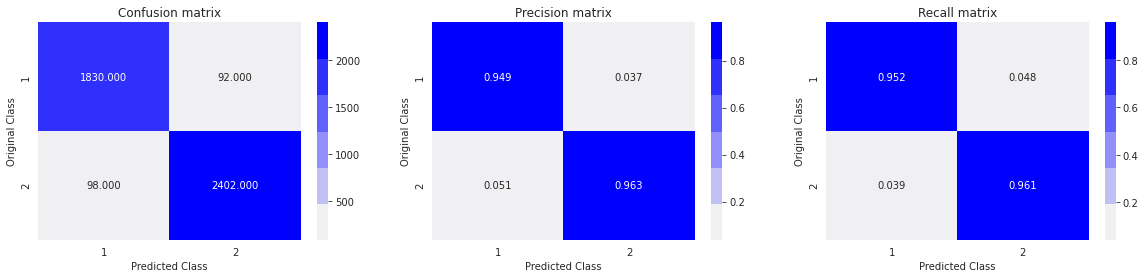

In [40]:
plot_confusion_matrix(test_Y, dtree_predict)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


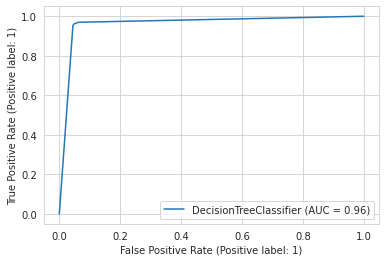

In [41]:
plot_roc_curve(model_3,test_X, test_Y)

In [42]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
model_4=rfc.fit(train_X,train_Y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
rfc_predict=model_4.predict(test_X)
print('The accuracy of Random Forest Classifier is: ' , 100.0 * accuracy_score(rfc_predict,test_Y))
print(classification_report(rfc_predict,test_Y))

The accuracy of Random Forest Classifier is:  96.92446856625962
              precision    recall  f1-score   support

          -1       0.96      0.97      0.96      1902
           1       0.98      0.97      0.97      2520

    accuracy                           0.97      4422
   macro avg       0.97      0.97      0.97      4422
weighted avg       0.97      0.97      0.97      4422



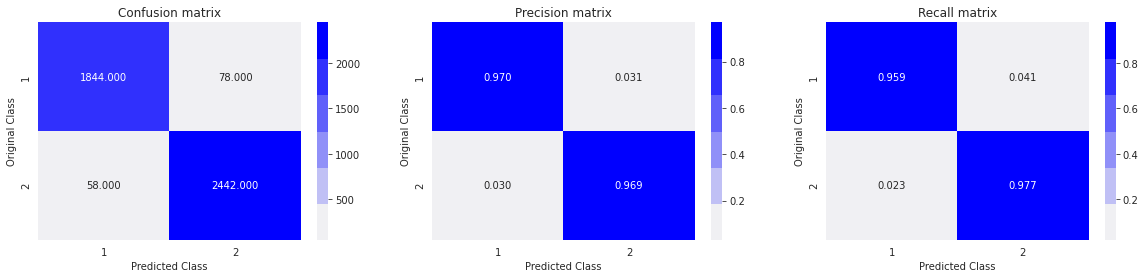

In [44]:
plot_confusion_matrix(test_Y, rfc_predict)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


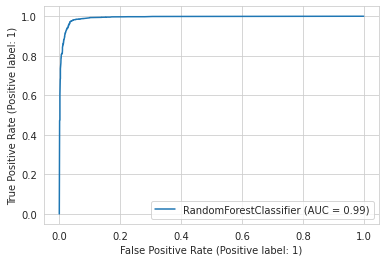

In [45]:
plot_roc_curve(model_4,test_X, test_Y)

In [46]:
from sklearn.svm import SVC
svc=SVC()
model_5=svc.fit(train_X,train_Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
svm_predict=model_5.predict(test_X)
print('The accuracy of SVM Classifier is: ', 100.0 * accuracy_score(svm_predict,test_Y))
print(classification_report(svm_predict,test_Y))

The accuracy of SVM Classifier is:  94.34644957033017
              precision    recall  f1-score   support

          -1       0.92      0.95      0.93      1848
           1       0.96      0.94      0.95      2574

    accuracy                           0.94      4422
   macro avg       0.94      0.94      0.94      4422
weighted avg       0.94      0.94      0.94      4422



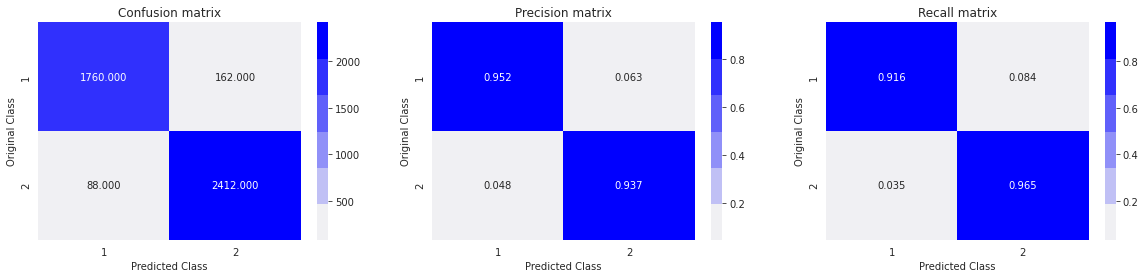

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


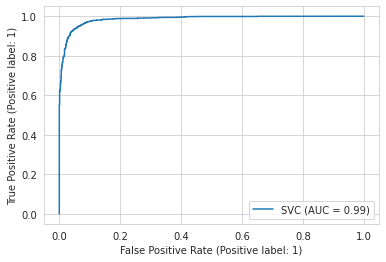

In [48]:
plot_confusion_matrix(test_Y, svm_predict)
plot_roc_curve(model_5,test_X, test_Y)

In [49]:
from sklearn.ensemble import AdaBoostClassifier
adc=AdaBoostClassifier(n_estimators=5,learning_rate=1)
model_6=adc.fit(train_X,train_Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
adc_predict=model_6.predict(test_X)
print('The accuracy of Ada Boost Classifier is: ', 100.0 * accuracy_score(adc_predict,test_Y))
print(classification_report(adc_predict,test_Y))

The accuracy of Ada Boost Classifier is:  91.42921754862053
              precision    recall  f1-score   support

          -1       0.90      0.90      0.90      1919
           1       0.92      0.92      0.92      2503

    accuracy                           0.91      4422
   macro avg       0.91      0.91      0.91      4422
weighted avg       0.91      0.91      0.91      4422



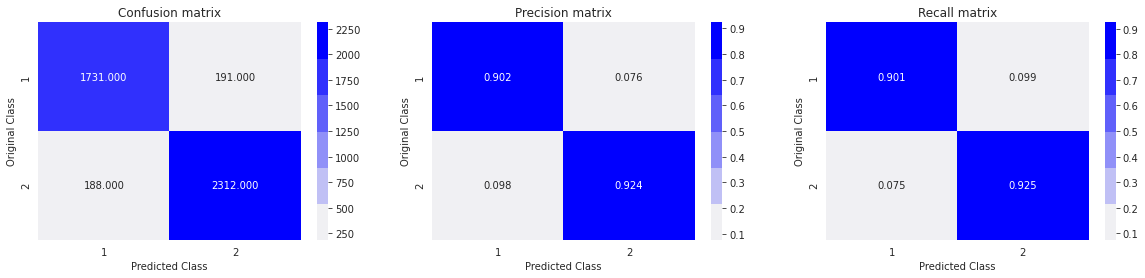

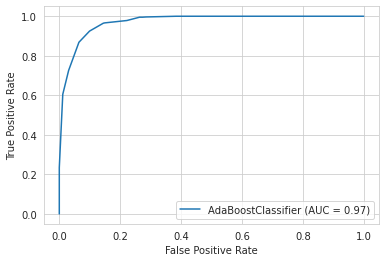

In [ ]:
plot_confusion_matrix(test_Y, adc_predict)
plot_roc_curve(model_6,test_X, test_Y)

In [51]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
model_7=xgb.fit(train_X,train_Y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy of XGBoost Classifier is:  94.86657620985979
              precision    recall  f1-score   support

          -1       0.90      0.90      0.90      1919
           1       0.92      0.92      0.92      2503

    accuracy                           0.91      4422
   macro avg       0.91      0.91      0.91      4422
weighted avg       0.91      0.91      0.91      4422



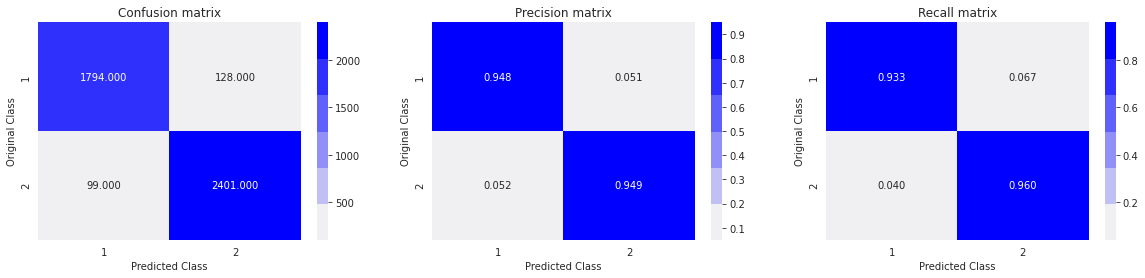

In [52]:
xgb_predict=model_7.predict(test_X)
print('The accuracy of XGBoost Classifier is: ' , 100.0 * accuracy_score(xgb_predict,test_Y))
print(classification_report(adc_predict,test_Y))
plot_confusion_matrix(test_Y, xgb_predict)

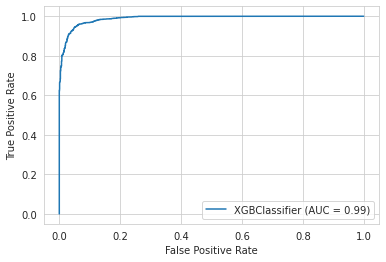

In [ ]:
plot_roc_curve(model_7,test_X, test_Y)

In [ ]:
print('Logistic Regression Accuracy:',100 * accuracy_score(logreg_predict,test_Y))
print('K-Nearest Neighbour Accuracy:',100* accuracy_score(knn_predict,test_Y))
print('Decision Tree Classifier Accuracy:',100* accuracy_score(dtree_predict,test_Y))
print('Random Forest Classifier Accuracy:',100*accuracy_score(rfc_predict,test_Y))
print('support Vector Machine Accuracy:',100*accuracy_score(svm_predict,test_Y))
print('Adaboost Classifier Accuracy:',100*accuracy_score(adc_predict,test_Y))
print('XGBoost Accuracy:',100*accuracy_score(xgb_predict,test_Y))

Logistic Regression Accuracy: 92.83129805517866
K-Nearest Neighbour Accuracy: 93.441881501583
Decision Tree Classifier Accuracy: 95.36408864767074
Random Forest Classifier Accuracy: 96.8340117593849
support Vector Machine Accuracy: 94.21076436001809
Adaboost Classifier Accuracy: 91.42921754862053
XGBoost Accuracy: 94.86657620985979


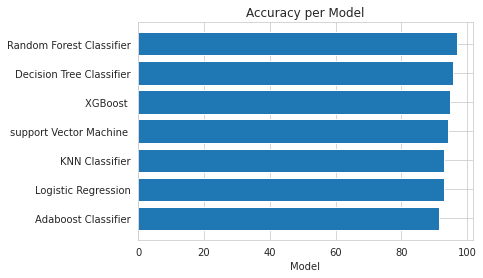

<Figure size 432x288 with 0 Axes>

In [ ]:
objects = ('Adaboost Classifier', 'Logistic Regression', 'KNN Classifier', 'support Vector Machine ', 'XGBoost ', 'Decision Tree Classifier', 'Random Forest Classifier')
y_pos = np.arange(len(objects))
performance = [91.42921754862053, 92.7860696517413, 93.08005427408412, 94.25599276345545, 94.86657620985979, 95.52238805970149, 96.85662596110357]
plt.barh(y_pos, performance, align='center', alpha=1.0)
plt.yticks(y_pos, objects)
plt.xlabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracy per Model')

plt.show()
plt.savefig('accuracy_per_model.png')